In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl


mpl.rcParams.update({
    'font.family':          'sans-serif',
    'font.sans-serif':      ['Arial'],
    'mathtext.fontset':     'custom',
    'mathtext.rm':          'Arial',
    'mathtext.it':          'Arial:italic',
    'mathtext.bf':          'Arial:bold',
    'mathtext.cal':         'Arial',        # for calligraphic if you like
})

In [2]:
dfs=[pd.read_csv(r'~\Arab Spring Paper\Arab Spring Code\Supp-Material\Attention\Topics of attention AS\topics_over_time_%s.csv'% g ) for g in ['GO', 'CW', 'GC']]

8
11
8


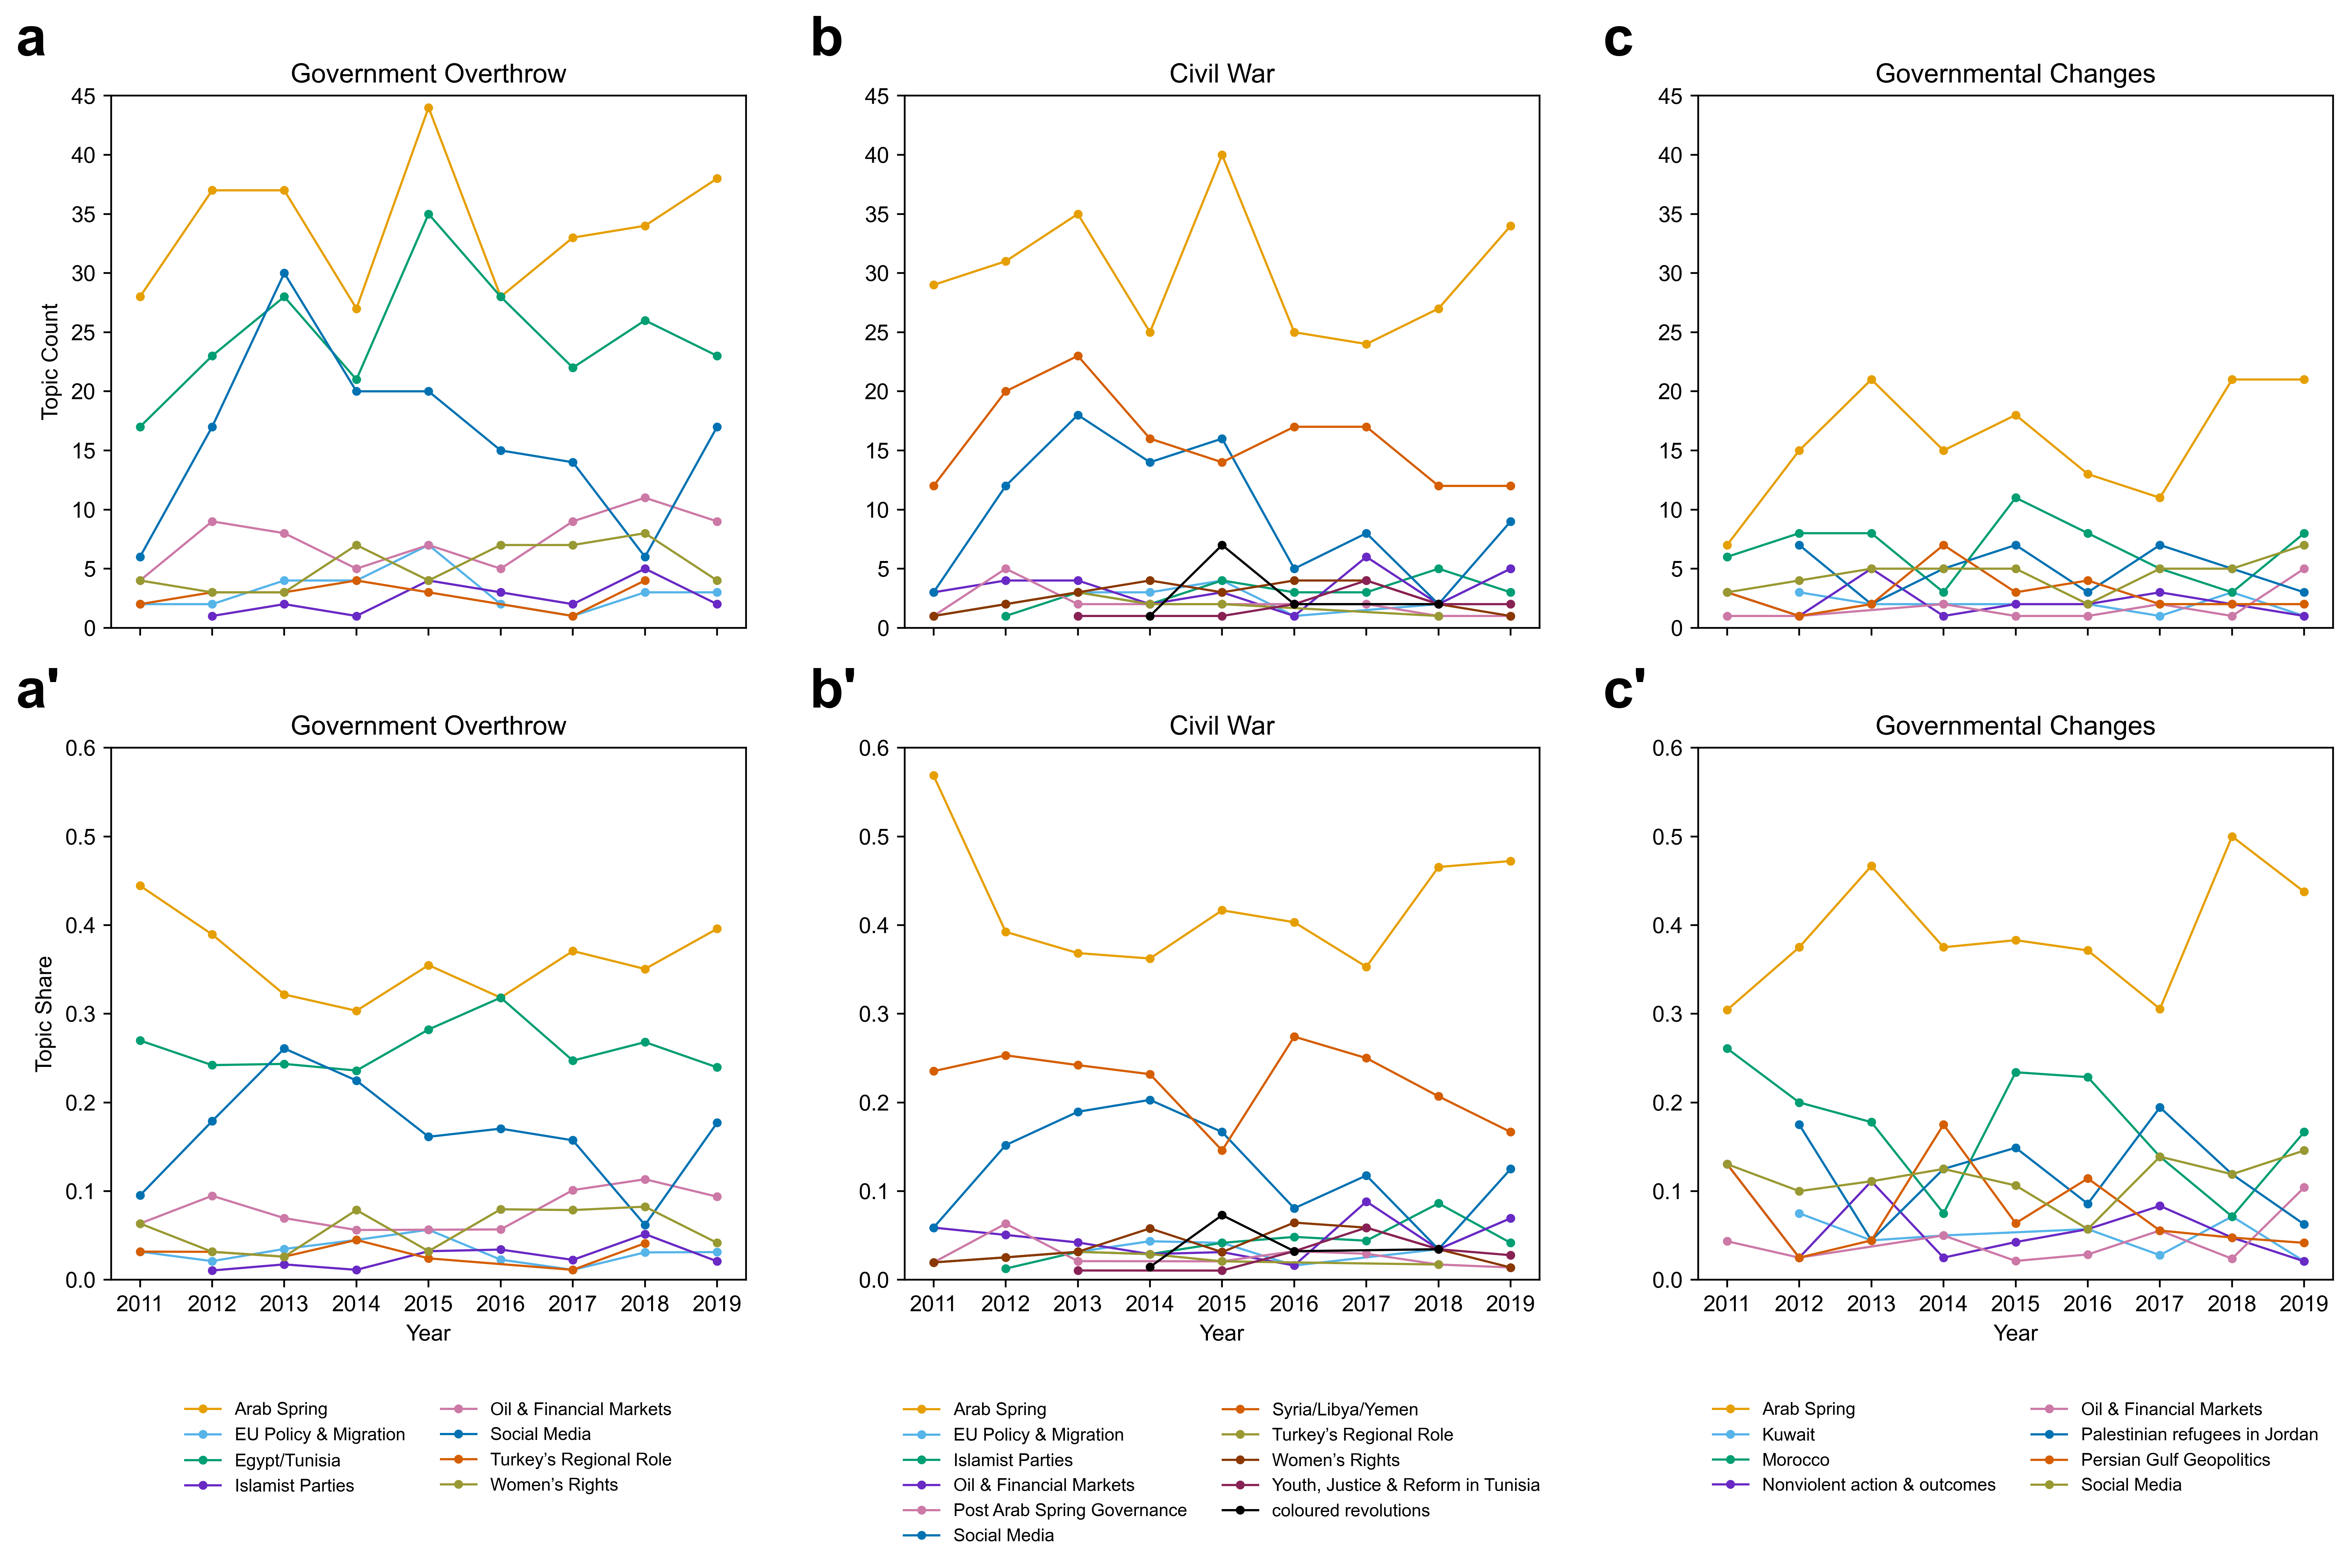

In [63]:
GO_merge_map = {
    -1: "Arab Spring",
    0:'Egypt/Tunisia',
    1: "Social Media",
    2: "Arab Spring",
    3: "Oil & Financial Markets",
    4: "Women’s Rights", 
    5:'Egypt/Tunisia',
    6:'EU Policy & Migration',
    7:'Egypt/Tunisia',
    8:'Islamist Parties',
    9:'Turkey’s Regional Role',
}

CW_merge_map={
    -1: "Arab Spring",
    0:'Syria/Libya/Yemen',
    1: "Social Media",
    2: "Arab Spring",
    3: "Syria/Libya/Yemen",
    4: "Oil & Financial Markets", 
    5:'Islamist Parties',
    6:'Women’s Rights',
    7:'EU Policy & Migration',
    8:'Syria/Libya/Yemen',
    9:'Post Arab Spring Governance',
    10:'Youth, Justice & Reform in Tunisia',
    11:'coloured revolutions',
    12:'Turkey’s Regional Role',
}


GC_merge_map={
    -1: "Arab Spring",
    0:'Morocco',
    1: "Social Media",
    2: "Palestinian refugees in Jordan",
    3: "Persian Gulf Geopolitics",
    4: "Nonviolent action & outcomes", 
    5:'Oil & Financial Markets',
    6:'Kuwait',


}
Maps=[GO_merge_map, CW_merge_map, GC_merge_map]



fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex=True, dpi=500)
G=0
for data, map,tag, group in zip(dfs, Maps, ['a', 'b', 'c'], ['Government Overthrow','Civil War', 'Governmental Changes']):
    data["MergedTopic"] = data["Topic"].map(map)
    to_plot=data.groupby(['MergedTopic', 'Timestamp']).sum().reset_index().sort_values( 'Timestamp')[['MergedTopic', 'Timestamp','Frequency']]
    
    to_plot_topics=sorted(to_plot['MergedTopic'].unique())
    print(len(to_plot_topics))
    to_plot["Share"] = to_plot.groupby("Timestamp")["Frequency"].transform(
    lambda x: x / x.sum())
    CB_COLORS = [
    "#E69F00",  # Orange
    "#56B4E9",  # Sky Blue
    "#009E73",  # Bluish Green
    "#6929C4",  # Purple 70
    "#CC79A7",  # Reddish Purple

    "#0072B2",  # Blue
    "#D55E00",  # Vermillion
    # Three additional color‑blind‑friendly hues from Paul Tol’s “Muted” scheme:
    "#999933",  # Teal
    "#8A3800",  # Magenta 50
    "#882255",  # Wine (added),
    '#000000'
]

    for i, t in enumerate(to_plot_topics):
        sub = to_plot[to_plot["MergedTopic"] == t].sort_values("Timestamp")
        # Choose y="Share" for proportions, or y="Count" for raw counts
        ax[0][G].plot(sub["Timestamp"], sub["Frequency"], label=t, linewidth=1, marker='.', color=CB_COLORS[i])
        ax[1][G].plot(sub["Timestamp"], sub["Share"], label=t, linewidth=1, marker='.', color=CB_COLORS[i])
        ax[1][G].set_ylim(0, 0.6)
        ax[0][G].set_ylim(0, 45)
    ax[1][G].legend(
        frameon=False,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.2),
        ncol=2,  # adjust depending on how many items you expect
        fontsize=8
    )
    ax[0][G].set_title(group)
    ax[1][G].set_title(group)
    ax[1][G].set_xlabel("Year")
    ax[0][G].text(-0.15, 1.15, tag, transform=ax[0][G].transAxes, verticalalignment='top', fontsize=25,fontweight='bold')
    ax[1][G].text(-0.15, 1.15, tag+'\'', transform=ax[1][G].transAxes, verticalalignment='top', fontsize=25,fontweight='bold')
    G+=1
    
ax[1][0].set_ylabel("Topic Share")
ax[0][0].set_ylabel("Topic Count")
fig.tight_layout()
fig.savefig('Topic_over_time.pdf')